# Demonstration of API using OpenWeatherMap.org
This demonstration is heavily inspired by [NeuralNine's video](https://www.youtube.com/watch?v=9P5MY_2i7K8).  
You need a free account [from here](https://openweathermap.org/api).  
The VS Code extension _JSON viewer_ is recommended for viewing downloaded JSON content.  
  - Set your maximum API calls to 1000 per day to make sure you are under the limit for billing. 
  - To run the examples, download your API key, save it in the right folder (see below) in a file called _api\_key\_OpenWeather_, containing only the key (no spaces or "enters").

In [1]:
# Imports
import datetime as dt
import requests
import json

## Current weather
### Common definitions to use for all requests

In [2]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('../../../No_sync/api_key_OpenWeather','r').read()
CITY = "Ski"

url = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [3]:
response = requests.get(url).json()
print(response)

{'coord': {'lon': 10.8358, 'lat': 59.7195}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.13, 'feels_like': 291.46, 'temp_min': 290.16, 'temp_max': 291.66, 'pressure': 1023, 'humidity': 95, 'sea_level': 1023, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.58, 'deg': 343, 'gust': 6.4}, 'clouds': {'all': 100}, 'dt': 1725474468, 'sys': {'type': 2, 'id': 2006772, 'country': 'NO', 'sunrise': 1725423612, 'sunset': 1725473485}, 'timezone': 7200, 'id': 3139081, 'name': 'Ski', 'cod': 200}


In [4]:
# Write JSON to file for viewing
with open('downloads/weather.json', 'w') as f:
    json.dump(response, f, indent=4)

## Conversion functions
Changing scales can make results more interpretable

In [5]:
# Kelvin to Celsius
def kelvin_to_celsius(temp):
    return temp - 273.15

# Meters per second to knots
def mps_to_knots(speed):
    return speed * 1.943844

## Print some weather properties

In [6]:
# Current temperature
temp_kelvin = response['main']['temp']
temp_celsius = kelvin_to_celsius(temp_kelvin)
print(f"The current temperature in {CITY} is {temp_celsius:.1f}°C")

The current temperature in Ski is 18.0°C


In [7]:
# Sunrise and sunset today in local time
sunrise = dt.datetime.fromtimestamp(response['sys']['sunrise'])
sunset = dt.datetime.fromtimestamp(response['sys']['sunset'])
print(f"Sunrise today is at {sunrise:%H:%M} and sunset is at {sunset:%H:%M}")

Sunrise today is at 06:20 and sunset is at 20:11


In [8]:
# Wind direction and speed
wind_knots = mps_to_knots(response['wind']['speed'])
print(f"Wind today is from {response['wind']['deg']}° at {round(wind_knots,1)} knots")

Wind today is from 343° at 5.0 knots


## Forecasted weather
### Common definitions to use for all requests

In [9]:
BASE_URL = "http://api.openweathermap.org/data/2.5/forecast?"
CITY = "Noresund"

urlF = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request forecasted weather in chosen city

In [10]:
responseF = requests.get(urlF).json()
print(responseF)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1725483600, 'main': {'temp': 289.48, 'feels_like': 289.73, 'temp_min': 288.7, 'temp_max': 289.48, 'pressure': 1025, 'sea_level': 1025, 'grnd_level': 969, 'humidity': 98, 'temp_kf': 0.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 99}, 'wind': {'speed': 1.91, 'deg': 344, 'gust': 2.92}, 'visibility': 10000, 'pop': 0.3, 'rain': {'3h': 0.27}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-09-04 21:00:00'}, {'dt': 1725494400, 'main': {'temp': 288.59, 'feels_like': 288.72, 'temp_min': 287.95, 'temp_max': 288.59, 'pressure': 1026, 'sea_level': 1026, 'grnd_level': 970, 'humidity': 97, 'temp_kf': 0.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 95}, 'wind': {'speed': 2.08, 'deg': 337, 'gust': 2.58}, 'visibility': 10000, 'pop': 0.3, 'rain': {'3h': 0.14}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-09-05 00:00:00'}, {'dt': 1725505200, '

In [11]:
# Write JSON to file for viewing
with open('downloads/forecast.json', 'w') as f:
    json.dump(responseF, f, indent=4)

### When and what?
Check contents and time stamps

In [12]:
# Content of responseF
responseF.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [13]:
# Number of forecasts
print(len(responseF["list"]))

40


In [14]:
# Print forecast times
for forecast in responseF["list"]:
    print(forecast["dt_txt"])

2024-09-04 21:00:00
2024-09-05 00:00:00
2024-09-05 03:00:00
2024-09-05 06:00:00
2024-09-05 09:00:00
2024-09-05 12:00:00
2024-09-05 15:00:00
2024-09-05 18:00:00
2024-09-05 21:00:00
2024-09-06 00:00:00
2024-09-06 03:00:00
2024-09-06 06:00:00
2024-09-06 09:00:00
2024-09-06 12:00:00
2024-09-06 15:00:00
2024-09-06 18:00:00
2024-09-06 21:00:00
2024-09-07 00:00:00
2024-09-07 03:00:00
2024-09-07 06:00:00
2024-09-07 09:00:00
2024-09-07 12:00:00
2024-09-07 15:00:00
2024-09-07 18:00:00
2024-09-07 21:00:00
2024-09-08 00:00:00
2024-09-08 03:00:00
2024-09-08 06:00:00
2024-09-08 09:00:00
2024-09-08 12:00:00
2024-09-08 15:00:00
2024-09-08 18:00:00
2024-09-08 21:00:00
2024-09-09 00:00:00
2024-09-09 03:00:00
2024-09-09 06:00:00
2024-09-09 09:00:00
2024-09-09 12:00:00
2024-09-09 15:00:00
2024-09-09 18:00:00


## Make plots of omnipresent measurements and events
We will later look at missing data, data only sporadically appearing and so on.

In [15]:
# Air pressure per period
pressures = []
timestamps = []
for forecast in responseF["list"]:
    pressures.append(forecast["main"]["pressure"])
    timestamps.append(dt.datetime.fromtimestamp(forecast["dt"]))

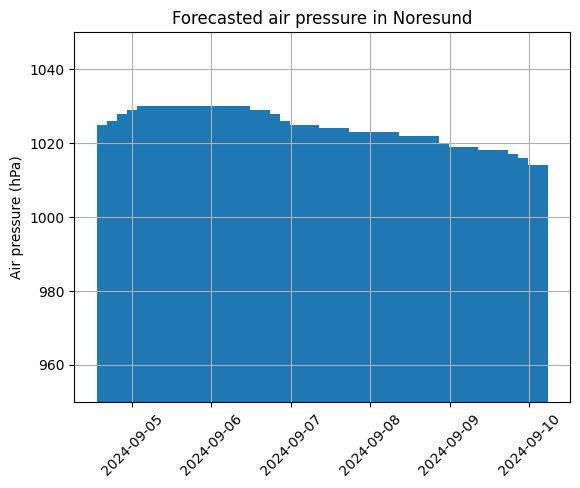

In [16]:
import matplotlib.pyplot as plt
plt.bar(timestamps, pressures)
plt.xticks(rotation=45)
plt.ylim(950, 1050)
plt.grid()
plt.ylabel("Air pressure (hPa)")
plt.title(f"Forecasted air pressure in {CITY}")
plt.show()

## Exercise
- Make a new forecast request for your own hometown. Call your response something else than responseF.
- If available, plot the humidity like we did with air pressure.

### Precipitation
- ... comes in two main flavours: rain and snow.
- We need to check which is present and set to zero if it is abscent.

In [17]:
rain = []
snow = []
for forecast in responseF["list"]:
    try: # Check if rain is present in forecast
        rain.append(forecast["rain"]["3h"])
    except KeyError:
        rain.append(0)
    try: # Check if snow is present in forecast
        snow.append(forecast["snow"]["3h"])
    except KeyError:
        snow.append(0)

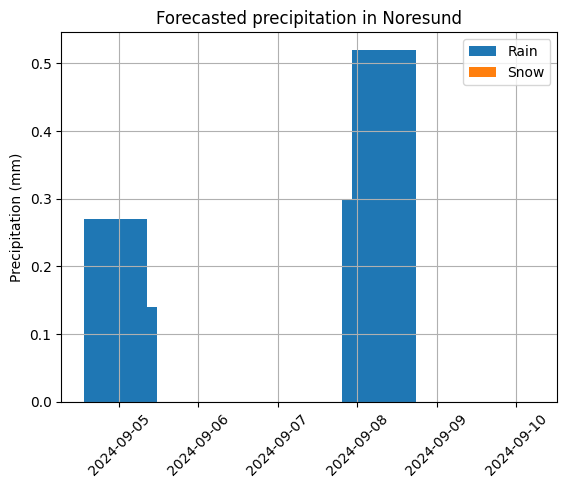

In [18]:
# Stacked bar chart with rain and snow
plt.bar(timestamps, rain, label="Rain")
plt.bar(timestamps, snow, label="Snow")
plt.xticks(rotation=45)
plt.grid()
plt.ylabel("Precipitation (mm)")
plt.title(f"Forecasted precipitation in {CITY}")
plt.legend()
plt.show()


```{seealso} Resources
:class: tip
- [YouTube: NeuralNine's video (15m:32s)](https://www.youtube.com/watch?v=9P5MY_2i7K8)
```